In [36]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
limg = cv2.imread('../../images/pin_l.png', 0)
rimg = cv2.imread('../../images/pin_r.png', 0)
print(limg.shape, rimg.shape)
assert limg.shape == rimg.shape, 'Different Shapes!'

(354, 400) (354, 400)


In [29]:
# Params
min_d = 0
max_d = 16
H, W = limg.shape
disparity = np.ones((H, W, max_d - min_d)).astype('int64')

min_diff_img = np.zeros((H, W)) # Opposite of confidence
min_disp_img = np.zeros((H, W))

# min_d_img = np.zeros((H, W))
# max_d_img = np.zeros((H, W))

In [66]:
def scale_img(img):
    '''
    - A utility function to convert image values to [0, 255] range
    '''
    out_img = ((img - np.min(img)) / (np.max(img) - np.min(img)))*255
    return out_img.astype('uint8')


In [42]:
for i in range(H):
    for j in range(W):
        min_diff = 1e+7
        min_idx = 0
        for d in range(max_d - min_d):
            if (j - d) < 0:
                disparity[i][j][d] = 1e+7
            else:
                disparity[i][j][d] = (limg[i][j] - rimg[i][j-d])**2
                if disparity[i][j][d] < min_diff:
                    min_diff = disparity[i][j][d]
                    min_idx = d
        
        min_diff_img[i][j] = min_diff
        min_disp_img[i][j] = min_idx

<ipython-input-42-d1133436dcae>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  disparity[i][j][d] = (limg[i][j] - rimg[i][j-d])**2


In [67]:
conf = scale_img(1 / (min_diff_img+1))
depth = scale_img(min_disp_img) # should be  reciprocal?

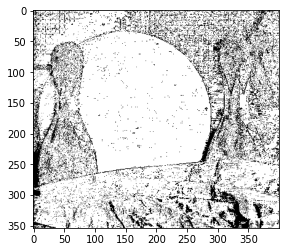

In [68]:
plt.imshow(conf, cmap='gray')

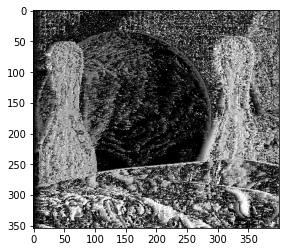

In [69]:
plt.imshow(min_disp_img, cmap='gray')

In [70]:
cv2.imwrite('pin_conf.png', conf)

True

In [71]:
cv2.imwrite('pin_depth.png', min_disp_img)

True

In [80]:
x = cv2.imread('../../images/pin_l.png')
# x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

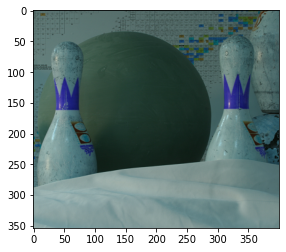

In [81]:
plt.imshow(x)

In [82]:
cv2.imwrite('pin_ref.jpg', x)

True